* 해당 강의 및 강의자료는 [이수안 컴퓨터연구소 | 의미 연결망 분석](https://www.youtube.com/watch?v=jnoKa44OZv8)을 참고해 작성하였습니다.

# 의미 연결망 분석(Semantic Network Analysis)

* 사회 연결망 분석(Social Network Analysis)는 분석 대상 및 분석 대상들간의 관계를   
연결망 구조로 표현하고 이를 계량적으로 제시하는 분석 기법
* 사회 연결망 분석은 사람, 장소, 물품 등의 객체 간의 관계를 분석하는데 효과적이며  
주로 친구 관계, 전력 공급 등을 분석하는데 사용
* 사회 연결망 분석 기법을 텍스트 내 단어의 관계에 적용한 것이 바로 의미 연결망 분석
* 의미 연결망 분석에서는 일정한 범위 내에서 어휘가 동시에 등장하면 서로 연결된 것으로 간주, 이 연결 관계들을 분석


**즉, 의미 연결망 분석은 기본적으로 동시 등장 확률을 기반으로 한다.**  
따라서, 해당 방식의 경우 존재하는 텍스트 내에서만 이용 가능, 확장에는 비교적 제한이 있다.  

## n-gram

* `nltk` 라이브러리는 편하게 n-gram을 생성할 수 있는 함수를 제공
* 많이 사용되는 `bigrams`의 경우에는 별도의 함수를 제공하니 해당 내용을 참조하여 n-gram 생성

In [1]:
import nltk

In [2]:
# 토큰화를 도와줄 word_tokenize
# 문장에서 순차적, 중첩적으로 두개의 단어를 하나의 튜플로 묶어주는 bigrams 
from nltk import word_tokenize, bigrams

In [3]:
sentence = "I Love Data science and deep learning"

# 토큰화를 진행합니다. 
tokens = word_tokenize(sentence)
# print(tokens)

# 정제된 토큰을 bigram화 합니다. 
bgram = bigrams(tokens)
# print(bgram)

# bigram은 객체이기 때문에 내부의 데이터를 확인하기 위해선 리스트화 해 관리해야 합니다. 
bgram_list = [x for x in bgram]
print(bgram_list)

[('I', 'Love'), ('Love', 'Data'), ('Data', 'science'), ('science', 'and'), ('and', 'deep'), ('deep', 'learning')]


In [4]:
sentence_ko = "안녕하세요 저는 박준휘입니다."

# 토큰화를 진행합니다. 
tokens_ko = word_tokenize(sentence_ko)
# print(tokens_ko)

# 정제된 토큰을 bigram화 합니다. 
bgram = bigrams(tokens_ko)
# print(bgram)

# bigram은 객체이기 때문에 내부의 데이터를 확인하기 위해선 리스트화 해 관리해야 합니다. 
bgram_list = [x for x in bgram]
print(bgram_list)

[('안녕하세요', '저는'), ('저는', '박준휘입니다'), ('박준휘입니다', '.')]


In [5]:
# grams를 다르게 할 수 있습니다. 
from nltk import ngrams

# tri-gram 
tgram = ngrams(tokens, 3)
# quad-gram 
qgram = ngrams(tokens, 4)

# 리스트화 합니다. 
tgram_list = [x for x in tgram]
qgram_list = [x for x in qgram]

print(tgram_list)
print(qgram_list)

[('I', 'Love', 'Data'), ('Love', 'Data', 'science'), ('Data', 'science', 'and'), ('science', 'and', 'deep'), ('and', 'deep', 'learning')]
[('I', 'Love', 'Data', 'science'), ('Love', 'Data', 'science', 'and'), ('Data', 'science', 'and', 'deep'), ('science', 'and', 'deep', 'learning')]


In [6]:
# grams를 다르게 할 수 있습니다. 
from nltk import ngrams

# tri-gram 
tgram = ngrams(tokens_ko, 3)
# quad-gram 
qgram = ngrams(tokens_ko, 4)

# 리스트화 합니다. 
tgram_list = [x for x in tgram]
qgram_list = [x for x in qgram]

print(tgram_list)
print(qgram_list)

[('안녕하세요', '저는', '박준휘입니다'), ('저는', '박준휘입니다', '.')]
[('안녕하세요', '저는', '박준휘입니다', '.')]


## 어휘 동시 출현 빈도의 계수화

* 동시 출현(Co-occurrence)란 두 개 이상의 어휘가 일정한 범위나 거리 내에서 함께 출현하는 것을 의미
* 단어간의 동시 출현 관계를 분석하면 문서나 문장으로부터 두 단어가 유사한 의미를 가졌는지 등의 추상화된 정보를 얻을 수 있음
* 동시 출현 빈도는 Window라는 지정 범위 내에서 동시 등장한 어휘를 확률 등으로 계수화 가능
* 예를 들어, 단어 뒤 잘못된 단어가 온다면, 이를 동시 출현 빈도가 높은 단어로 교정 가능

* 어휘 동시 출현 빈도 행렬은 하나하나 측정할 수도 있지만, 바이그램 개수를 정리하면 편리하게 만들어 볼 수 있음
* `nltk`에서 제공하는 `ConditionalFreqDist` 함수를 이용하면 문맥별 단어 빈도를 쉽게 측정 가능

In [7]:
from nltk import ConditionalFreqDist

sentences = ["I love data science and deep learning", "I love science", "I know you"]

# 각각의 문장의 토큰화를 진행합니다 .(결과: 토큰처리된 이중리스트)
tokens =[word_tokenize(x) for x in sentences]
# 각각의 문장을 bigram 처리해줍니다. 
bgrams = [bigrams(x) for x in tokens]

token = []
# 각각의 문장을 가져와 
for i in bgrams:
    # 하나씩 꺼내 리스트화 후 추가 
    token += ([x for x in i])

# print(token) 

# conditional frequent dist. 
cfd = ConditionalFreqDist(token)
# print(cfd) # 객체출력 
print(cfd.keys())
print(cfd.conditions()) 
print(cfd.items())

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know'])
['I', 'love', 'data', 'science', 'and', 'deep', 'know']
dict_items([('I', FreqDist({'love': 2, 'know': 1})), ('love', FreqDist({'data': 1, 'science': 1})), ('data', FreqDist({'science': 1})), ('science', FreqDist({'and': 1})), ('and', FreqDist({'deep': 1})), ('deep', FreqDist({'learning': 1})), ('know', FreqDist({'you': 1}))])


In [8]:
# 각각의 단어에 대한 조회가 가능힙ㄴ;디/ 
print(cfd["I"]) # 두개의 샘플(사례), 3개의 총 등장 갯수 

<FreqDist with 2 samples and 3 outcomes>


In [9]:
# 특정 시퀀스에 대한 조회도 가능합니다. 
print(cfd["I"]["love"]) # 동시 출현 빈도 2 

2


In [10]:
# I와 가장 동시 등장 빈도가 많은 것 
print(cfd["I"].most_common(1))

# I와 가장 & 두번째로 동시 등장 빈도가 많은 것 
print(cfd["I"].most_common(2))

[('love', 2)]
[('love', 2), ('know', 1)]


* 인접행렬을 도출합니다. 

In [11]:
import numpy as np 

freq_matrix = [] 

for i in cfd.keys():
    temp = [] 
    for j in cfd.keys():
        temp.append(cfd[i][j]) # i와 j의 동시 출현 빈도 --> int 
    freq_matrix.append(temp)
    
print(cfd.keys())
print(freq_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know'])
[[0, 2, 0, 0, 0, 0, 1], [0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]


* 해당 동시 출현 빈도 행렬을 좀 더 보기 쉽도록 데이터프레임으로 시각화

In [12]:
import pandas as pd 

freq_df = pd.DataFrame(data=freq_matrix, index=cfd.keys(), columns=cfd.keys())

# 배경색 변경 
freq_df.style.background_gradient(cmap="coolwarm")

,I,love,data,science,and,deep,know
I,0,2,0,0,0,0,1
love,0,0,1,1,0,0,0
data,0,0,0,1,0,0,0
science,0,0,0,0,1,0,0
and,0,0,0,0,0,1,0
deep,0,0,0,0,0,0,0
know,0,0,0,0,0,0,0


* 동시 출현 빈도 행렬은 인접 행렬로도 간주할 수 있음
* `networkx` 라이브러리를 사용해 해당 행렬을 그래프로 시각화

* 앞서 만든 데이터프레임을 그래프로 변환
* 넘파이 배열 등으로도 가능하나, 이 경우 별도로 라벨을 지정해줘야만 함

In [13]:
import networkx as nx 

# 그래프 객체 생성 
    # 판다스 데이터를 바로 불러올 수 있습니다.(인접행렬만) 
G = nx.from_pandas_adjacency(freq_df)

print(G.nodes())
print(G.edges())

['I', 'love', 'data', 'science', 'and', 'deep', 'know']
[('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep')]


* 각 엣지에 접근해보면 각 엣지의 가중치에 각 단어간의 빈도가 사용된 것을 확인 가능

In [14]:
print(G.edges()[("I", "love")])
print(G.edges()[("I", "know")])
# print(G.edges()[("know", "love")]) # 간선 없으면 에러

{'weight': 2}
{'weight': 1}


* `nx.draw`를 통해 간편하게 그래프를 시각화할 수 있음

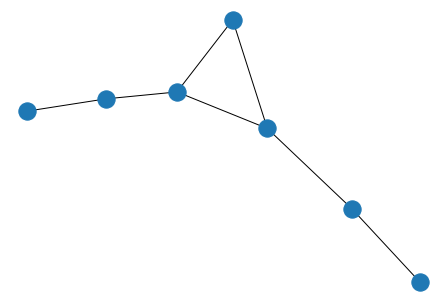

In [15]:
nx.draw(G)

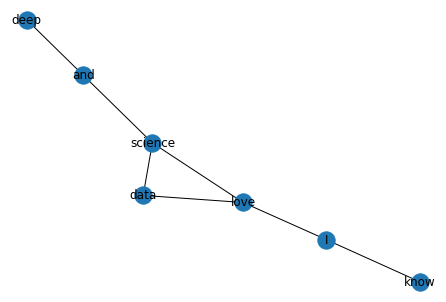

In [18]:
nx.draw(G, with_labels=True)

* 어휘 동시 출현 빈도를 이용하면 어휘 동시 출현 확률까지 측정 가능
* 어휘 동시 출현 확률 계산에는 `nltk`의 `ConditionalProbDist`를 이용

In [19]:
from nltk.probability import ConditionalProbDist, MLEProbDist 

# probability density 
cpd = ConditionalProbDist(cfd, MLEProbDist) # 인자로 빈도수 객체와 확률 추정 방식(MLE 최대우도 확률)을 입력
cpd.conditions()

['I', 'love', 'data', 'science', 'and', 'deep', 'know']

In [22]:
prob_matrix = [] 
for i in cpd.keys():
    temp = [] 
    for j in cpd.keys():
        temp.append(cpd[i].prob(j))
    prob_matrix.append(temp)
prob_matrix = np.array(prob_matrix)

print(cpd.keys())
print(prob_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know'])
[[0.         0.66666667 0.         0.         0.         0.
  0.33333333]
 [0.         0.         0.5        0.5        0.         0.
  0.        ]
 [0.         0.         0.         1.         0.         0.
  0.        ]
 [0.         0.         0.         0.         1.         0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


In [26]:
df = pd.DataFrame(data=prob_matrix, index=cpd.keys(), columns=cpd.keys())

df.style.background_gradient(cmap='coolwarm')

,I,love,data,science,and,deep,know
I,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.333333
love,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000
data,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
science,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
and,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
deep,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
know,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


* 확률 행렬도 인접 행렬로 간주할 수 있음
* 그래프 시각화시 빈도 행렬과 동일한 결과를 얻을 수 있으나, 확률을 가중치로 사용시 부정확한 결과를 얻을 수 있음

In [27]:
prob_G = nx.from_pandas_adjacency(df)

print(prob_G.nodes())
print(prob_G.edges())

['I', 'love', 'data', 'science', 'and', 'deep', 'know']
[('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep')]


In [29]:
print(G.edges()[("I", "love")])
print(G.edges()[("I", "know")])
# print(G.edges()[("know", "love")]) # 간선 없으면 에러

print(prob_G.edges()[("I", "love")])
print(prob_G.edges()[("I", "know")])
# print(prob_G.edges()[("know", "love")]) # 간선 없으면 에러

{'weight': 2}
{'weight': 1}
{'weight': 0.6666666666666666}
{'weight': 0.3333333333333333}


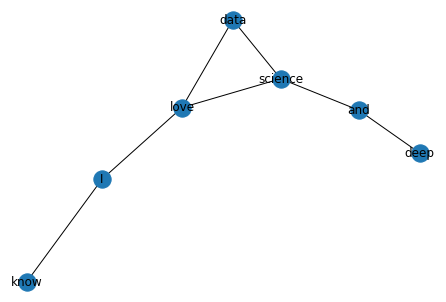

In [30]:
nx.draw(prob_G, with_labels=True)

## 중심성(Centrality) 지수

* 연결망 분석에서 가장 많이 주목하는 속성은 바로 중심성 지수
* 중심성은 전체 연결망에서 중심에 위치하는 정도를 표현하는 지표로, 이를 분석하면 연결 정도, 중요도 등을 알 수 있음
* 중심성 지수는 나타내는 특징에 따라 연결 중심성, 매개 중심성, 근접 중심성, 위세 중심성으로 구분

### 연결 중심성(Degree Centrality)

* 연결 중심성은 가장 기본적이고 직관적으로 중심섬을 측정하는 지표
* 텍스트에서 다른 단어와의 동시 출현 빈도가 많은 특정 단어는 연결 중심성이 높다고 볼 수 있음
* 연결 정도로만 측정하면 연결망의 크기에 따라 달라져 비교가 어렵기 때문에 여러 방법으로 표준화
    * 주로 (특정 노드 i와 직접적으로 연결된 노드 수 / 노드 i와 직간접적으로 연결된 노드 수)로 계산 (표준화)

* 여기서 직접적으로 연결된 노드는 서로 엣지 관계인 노드를 뜻하며, 간접적으로 연결된 노드는 서로 엣지 관계는 아니나 다른 노드와 엣지에 의해 도달할 수 있는 노드를 말함

* 연결 중심성 계산 수식

$$ degree_{ik} = \sum_{i=1}^{N} Z_{ijk} = Z_{jk}$$
$$ outdegree_{ik} = \sum_{j=1}^{N} Z_{ijk} = Z_{ik} $$
$$ C_{i} = \sum_{j=1}^{n}(Z_{ij}+Z_{ji}) / \sum_{i=1}^{n}\sum_{j=1}^{n}(Z_{ij})\qquad단, 0\le C \le 1$$

* 해당 수식을 직접 계산할 수도 있으나,     
`networkx`에는 해당 라이브러리로 구성된 그래프의 연결 중심성을 쉽게 계산해주는 함수가 존재   

In [31]:
nx.degree_centrality(G)

{'I': 0.3333333333333333,
 'love': 0.5,
 'data': 0.3333333333333333,
 'science': 0.5,
 'and': 0.3333333333333333,
 'deep': 0.16666666666666666,
 'know': 0.16666666666666666}

### 위세 중심성(Eigenvector Centraility)

* 위세 중심성은 연결된 상대 단어의 중요성에 가중치를 둠
* 중요한 단어와 많이 연결됐다면 위세 중심성은 높아지게 됨
* 위세 중심성은 고유 벡터로써 인접해 있는 노드의 위세 점수와 관련되어 있어 직접 계산하기는 쉽지 않음

* 위세 중심성 계산 수식

$$ P_i =\sum_{j=1}^{N-1}P_iZ_{ji},\qquad0 \le P_i \le 1$$

* 위세 중심성 계산에는 `eigenvector_centraility`를 이용해 계산
* `weight`로는 어휘 동시 출현 빈도를 이용

In [32]:
nx.eigenvector_centrality(G, weight='weight')

{'I': 0.5025212561429093,
 'love': 0.6247065266151558,
 'data': 0.36287988662949866,
 'science': 0.4053536543861849,
 'and': 0.16303745214628135,
 'deep': 0.0574371357838416,
 'know': 0.17703251146358778}

### 근접 중심성(Closeness Centrality)


* 근접 중심성은 한 단어가 다른 단어에 얼마나 가깝게 있는지를 측정하는 지표
* 직접적으로 연결된 노드만 측정하는 연결 중심성과는 다르게, 근접 중심성은 직간접적으로 연결된 모든 노드들 사이의 거리를 측정
* 근접 중심성을 측정하기 위해선 다음과 같이 계산

  (모든 노드 수 - 1 / 특정 노드 i에서 모든 노드에 이르는 최단 경로 수를 모두 더한 수)


$$ C_C(A) = \frac{1}{\frac{1}{N-1}\sum_{x \ne A}l_{X,A}} = \frac{N-1}{\sum_{x \ne A}l_{X,A}} $$

* 근접 중심성을 계산하기 위해선 `closeness_centrality()` 함수를 사용

In [33]:
# distance를 기준으로 계산되기 때문에, distance를 넣어주어야 합니다. 
nx.closeness_centrality(G, distance='weight') # 여기에서는 weight 값이 노드 사이의 연결  수 (강도)를 나타내기 때문에 distance 값으로 weight를 써줍니다. 

{'I': 0.3333333333333333,
 'love': 0.5,
 'data': 0.42857142857142855,
 'science': 0.5,
 'and': 0.4,
 'deep': 0.3,
 'know': 0.2608695652173913}

### 매개 중심성(Betweeness Centrality)

* 매개 중심성은 한 단어가 단어들과의 연결망을 구축하는데 얼마나 도움을 주는지 측정하는 지표
* 매개 중심성이 높은 단어는 빈도 수가 작더라도 단어 간 의미부여 역할이 크기 때문에, 해당 단어를 제거하면 의사소통이 어려워짐
* 매개 중심성은 모든 노드 간 최단 경로에서 특정 노드가 등장하는 횟수로 측정하며,     
표준화를 위해 최댓값인 (N-1) x (N-2) / 2로 나눔

* 매개 중심성 계산 수식

$$ C_{B}^{'}(P_m) = \frac{\sum_i^N \sum_j^N \frac{g_{imj}}{g_{ij}}}{(\frac{N^2-3N+2}{2})}, \qquad 단, i<j,\quad i \ne j$$

* 매개 중심성을 계산하기 위해선 `current_flow_betweenness_centrality()` 함수를 이용

In [35]:
nx.betweenness_centrality(G)

{'I': 0.3333333333333333,
 'love': 0.5333333333333333,
 'data': 0.0,
 'science': 0.5333333333333333,
 'and': 0.3333333333333333,
 'deep': 0.0,
 'know': 0.0}

In [34]:
nx.current_flow_betweenness_centrality(G)

{'I': 0.3333333333333333,
 'love': 0.6000000000000001,
 'data': 0.19999999999999976,
 'science': 0.6,
 'and': 0.3333333333333333,
 'deep': 0.0,
 'know': 5.921189464667501e-17}

### 페이지랭크(PageRank)

* 월드 와이드 웹과 같은 하이퍼링크 구조를 가지는 문서에 상대적 중요도에 따라 가중치를 부여하는 방법
* 이 알고리즘은 서로간에 인용과 참조로 연결된 임의의 묶음에 적용 가능
* 페이지 랭크는 더 중요한 페이지는 더 많은 다른 사이트로부터 링크를 받는다는 관찰에 기초

In [36]:
nx.pagerank(G)

{'I': 0.1780202814749458,
 'love': 0.22471372207546078,
 'data': 0.12041327409353741,
 'science': 0.18082095384374972,
 'and': 0.14227110224322492,
 'deep': 0.08189354816901959,
 'know': 0.07186711810006174}

### 중심성 지수의 시각화

In [37]:
# 각 노드의 중심성에 따라 노드의 크기를 다르게 부여합니다. 
# 이를 위한 함수를 선언합니다. 
# dl 
def get_node_size(node_values):
    nsize = np.array([v for v in node_values])
    # normalize (minmax)
    nsize = 1000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))
    return nsize 


In [39]:
import matplotlib.pyplot as plt 
plt.style.use("seaborn-white")

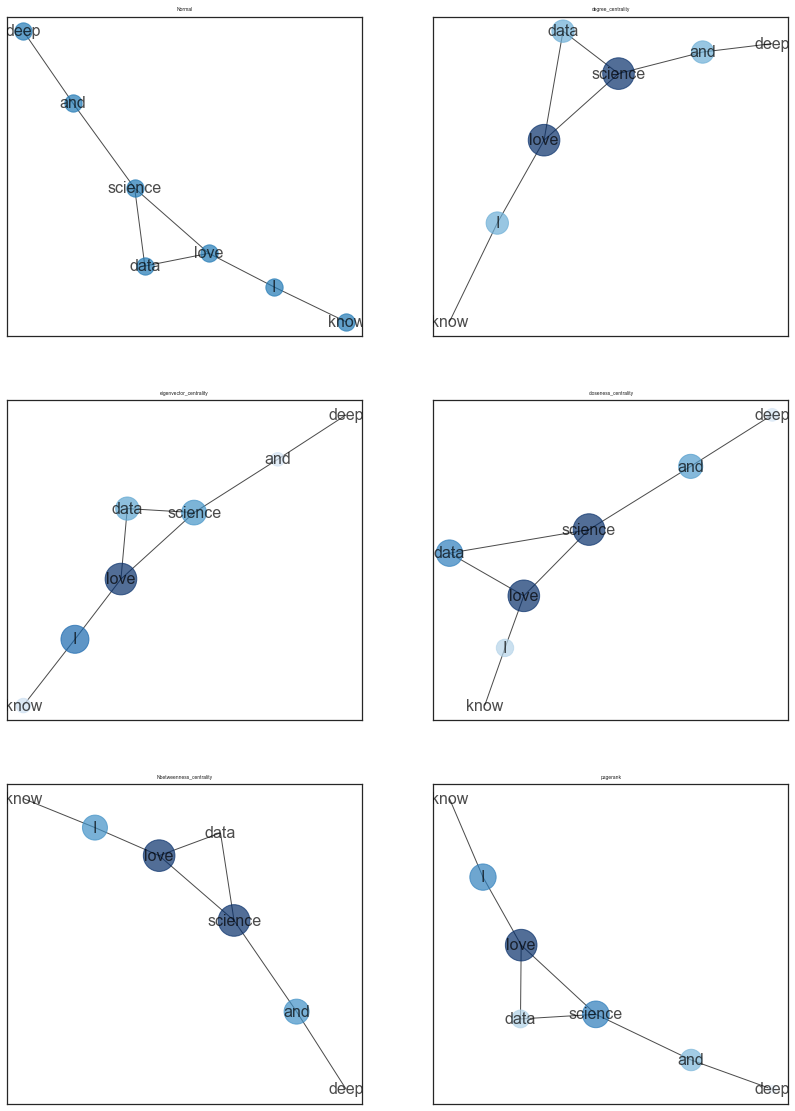

In [45]:
# 각각의 중심성향 값들을 구하고 value들만 담습니다. 
dc = nx.degree_centrality(G).values()
ec = nx.eigenvector_centrality(G, weight='weight').values()
cc = nx.closeness_centrality(G, distance='weight').values()
bc = nx.betweenness_centrality(G).values()
pr = nx.pagerank(G).values()

plt.figure(figsize=(14,20))
plt.axis('off')

plt.subplot(321)
plt.title('Normal', fontsize=5)
nx.draw_networkx(G, font_size=16, 
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(322)
plt.title('degree_centrality', fontsize=5)
nx.draw_networkx(G, font_size=16, 
                 alpha=0.7, cmap=plt.cm.Blues,
                 node_color=list(dc), node_size=get_node_size(dc))

plt.subplot(323)
plt.title('eigenvector_centrality', fontsize=5)
nx.draw_networkx(G, font_size=16, 
                 alpha=0.7, cmap=plt.cm.Blues,
                 node_color=list(ec), node_size=get_node_size(ec))

plt.subplot(324)
plt.title('closeness_centrality', fontsize=5)
nx.draw_networkx(G, font_size=16, 
                 alpha=0.7, cmap=plt.cm.Blues,
                 node_color=list(cc), node_size=get_node_size(cc))

plt.subplot(325)
plt.title('Nbetweenness_centrality', fontsize=5)
nx.draw_networkx(G, font_size=16, 
                 alpha=0.7, cmap=plt.cm.Blues,
                 node_color=list(bc), node_size=get_node_size(bc))

plt.subplot(326)
plt.title('pagerank', fontsize=5)
nx.draw_networkx(G, font_size=16, 
                 alpha=0.7, cmap=plt.cm.Blues,
                 node_color=list(pr), node_size=get_node_size(pr))

## 여러가지 레이아웃 지정 옵션 

In [51]:
pl = nx.planar_layout(G)
frl = nx.fruchterman_reingold_layout(G)
specl = nx.spectral_layout(G)
rl = nx.random_layout(G)
shl = nx.shell_layout(G)
bl = nx.bipartite_layout(G, G.nodes())
cl = nx.circular_layout(G)
sprl = nx.spring_layout(G)
kkl = nx.kamada_kawai_layout(G)

# 옵션이 너무 많아 dict 가변인자로 정의하고 
# 인자를 넣어줄 땐 **options로 입력합니다. 
options = {
    'font_size': 16,
    'node_color':list(pr),
    'node_size':get_node_size(pr),
    'alpha':0.7,
    'cmap': plt.cm.Blues
}

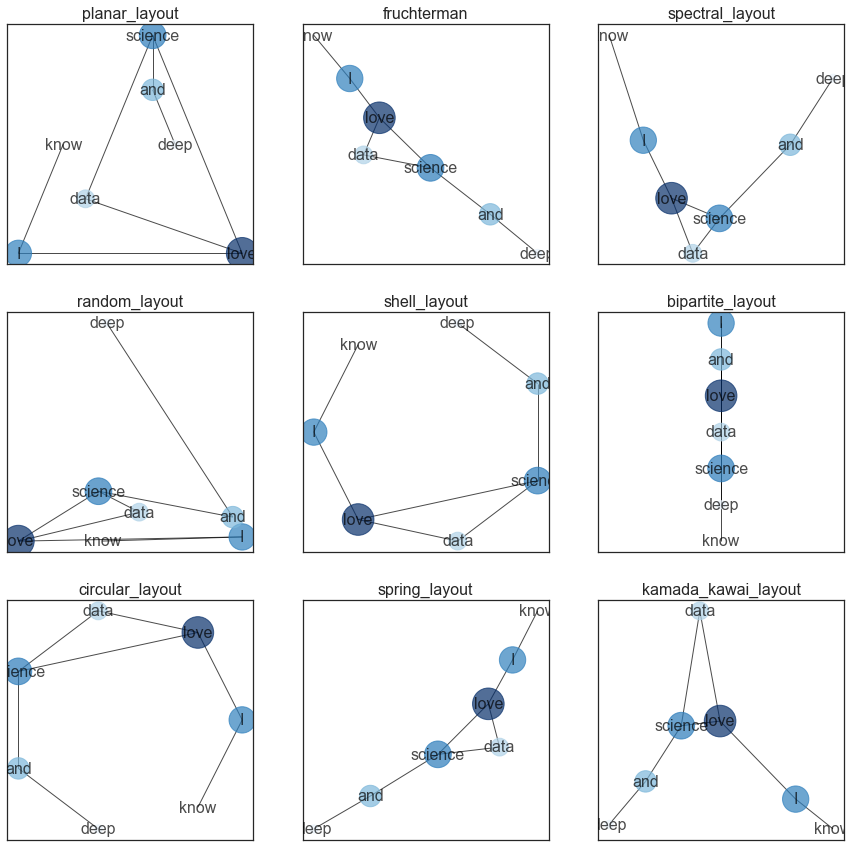

In [54]:
plt.figure(figsize=(15,15))
plt.axis('off')

plt.subplot(331)
plt.title('planar_layout',fontsize=16)
nx.draw_networkx(G, pos= pl, **options)

plt.subplot(332)
plt.title('fruchterman',fontsize=16)
nx.draw_networkx(G, pos=frl , **options)

plt.subplot(333)
plt.title('spectral_layout',fontsize=16)
nx.draw_networkx(G, pos= specl, **options)

plt.subplot(334)
plt.title('random_layout',fontsize=16)
nx.draw_networkx(G, pos=rl , **options)

plt.subplot(335)
plt.title('shell_layout',fontsize=16)
nx.draw_networkx(G, pos=shl , **options)

plt.subplot(336)
plt.title('bipartite_layout',fontsize=16)
nx.draw_networkx(G, pos= bl, **options)

plt.subplot(337)
plt.title('circular_layout',fontsize=16)
nx.draw_networkx(G, pos= cl, **options)

plt.subplot(338)
plt.title('spring_layout',fontsize=16)
nx.draw_networkx(G, pos= sprl, **options)

plt.subplot(339)
plt.title('kamada_kawai_layout',fontsize=16)
nx.draw_networkx(G, pos=kkl , **options)

plt.show()

In [1]:
import networkx as nx 

In [ ]:
nx.c